![](figs/se_02.png)
# Workshop Instructions
***
- <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> Follow along by typing the code yourself - this helps with learning!
- <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> Code cells marked as "Exercise" are for you to complete
- <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> Look for hints if you get stuck
- <img src="figs/icons/success.svg" width="20" style="filter: invert(56%) sepia(71%) saturate(5293%) hue-rotate(117deg) brightness(95%) contrast(101%);"/> Compare your solution with the provided answers
- <img src="figs/icons/list.svg" width="20" style="filter: invert(19%) sepia(75%) saturate(6158%) hue-rotate(312deg) brightness(87%) contrast(116%);"/> Don't worry if you make mistakes - debugging is part of learning!


In [1]:
from pathlib import Path
import sys

helper_utils = Path(Path.cwd(), 'utils')

if str(helper_utils) not in sys.path:
    sys.path.append(str(helper_utils))

import utils
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

challenger_temp = 0.56
checker = utils.core.ExerciseChecker("SE02")

Faculty of Science and Engineering 🔬
The University of Manchester 
Invoking utils version: 0.9.5


# 1. Artificial Neural Networks
***
Artificial Neural Networks (ANNs) are machine learning models inspired by the human brain, consisting of interconnected nodes (neurons) organized in layers. They form the foundation of deep learning and typically contain:

- **Input layer**: Receives the initial data/features
- **Hidden layer(s)**: Processes the information
- **Output layer**: Produces the final prediction/result

Each neuron connects to neurons in the next layer through weighted connections that are adjusted during training to minimize the difference between predicted and actual outputs.

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\ann.png" alt="Artificial Neural Networks" align="center" style="width: 40%; height: auto; margin: 0 auto;">
</figure>

## 1.1 Neurons
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Neurons are the basic building blocks of ANNs, similar to biological neurons. Each neuron receives inputs, applies a transformation, and produces an output.

The basic structure of a neuron can be seen below:

<figure style="background-color: white; border-radius: 10px; padding: 20px; text-align: center; margin: 0 auto;">
    <img src="figs\non_linenar_neuron.png" alt="Single Neuron" align="center" style="width: 60%; height: auto; margin: 0 auto;">
</figure>

### Neuron Output Formula

The output of a neuron after applying the activation function is:
$$ \hat{y} = f(W \cdot X + b)$$

where: 
- $ \hat{y} $  Predicted output of the neuron (may differ from actual output) 
- $ f $  Activation function (introduces non-linearity, e.g., sigmoid, tanh, ReLU) 
- $ W $  Weight vector (determines connection strengths) 
- $ X $  Input vector (features of the data) 
- $ b $  Bias term (shifts the activation function) 
- $ \cdot $  Dot product between weight and input vectors 

> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: Weights and biases are learnable parameters of a neural network. Weights determine the strength of connections between neurons, while biases allow the neuron to shift the activation function.

### 1.1.1 Features and Targets
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: In machine learning, we refer to inputs as features and outputs as targets.

In neural networks:

- **Features (X)**: Input variables/attributes used for prediction
- **Targets (y)**: Values we're trying to predict (ground truth labels)

Now let's implement a neuron in Python using PyTorch. We'll create a `Neuron` class that handles the *forward pass* - passing inputs to the neuron and computing the output.

> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Note**: We'll use PyTorch's `torch.nn.Module` as a base class and `torch.nn.Parameter` to define weights and biases, making them learnable parameters that can be updated during training.

> <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> **Snippet 1**: nn.Module and nn.Parameter
```python
weight = torch.nn.Parameter(torch.randn(2, 1), requires_grad=True)
bias = torch.nn.Parameter(torch.randn(1))

```


In [2]:
# Exercise 1: Implementing a Neuron 🎯
# Implement:
# 1. The sigmoid function
# 2. A neuron using torch.nn.Module but with manual parameter handling
# 3. Create a neuron with specified input features and initialize weights
# 4. Define an input vector x with two features
# 5. Use the neuron to compute an output

def sigmoid(x:torch.Tensor) -> torch.Tensor:
    # The sigmoid function is defined as:
    # sigmoid(x) = 1 / (1 + exp(-x))
    return 1 / (1 + torch.exp(-x)) # Your code here

class Perceptron(torch.nn.Module):
    def __init__(self, n_features:int, activation:callable=sigmoid) -> None:
        # Initialize the neuron as a PyTorch module
        super().__init__()
        # Initialize weights with random values - Parameter makes it learnable
        self.weights = torch.nn.Parameter(torch.randn(n_features)) # Your code here
        
        # Initialize bias to a random value
        self.bias = torch.nn.Parameter(torch.randn(1)) # Your code here
        
        self.activation = activation # Your code here

        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # 1. Compute linear output manually (dot product of inputs and weights + bias)
        # 2. Apply the activation function to the result
        # 3. Return the output
        
        linear_output = torch.dot(x, self.weights) + self.bias # Your code here
        
        output = self.activation(linear_output) # Your code here
        
        return output
    
    def __repr__(self) -> str:
        """String representation of the neuron"""
        return f"Neuron (weights = {self.weights.detach()}, bias = {self.bias.detach()})"

# Create a neuron with 2 input features
neuron = Perceptron(n_features=2)

# Define an input vector x with two features
# with values 1.0, 2.0
x = torch.tensor([1.0, 2.0]) # Your code here

# Let's use our neuron to compute an output
output = neuron(x)  # In PyTorch modules, we call the object directly instead of .forward()

# Print the output to see the result
print(f"Output from neuron: {output.item()}")
print(neuron)
print(f"Neuron has {len(neuron.weights)} weights")

# ✅ Check your answer
answer = {
    'sigmoid': sigmoid,
    'neuron_output': output,
    'neuron_input_size': len(neuron.weights),
    'has_bias': hasattr(neuron, 'bias'),
    'is_parameterized': isinstance(neuron.weights, torch.nn.Parameter)
}
checker.check_exercise(1, answer)

Output from neuron: 0.743232786655426
Neuron (weights = tensor([0.6710, 0.6143]), bias = tensor([-0.8368]))
Neuron has 2 weights
--------------------------------------------------------------------------------
✅ sigmoid is correct!
✅ neuron_input_size is correct!
✅ has_bias is correct!
✅ is_parameterized is correct!

🎉 Excellent! All parts are correct!


Perceptron Architecture:
  - Input features: 2
  - Activation function: sigmoid
  - Output: 1 (probability between 0 and 1)

Graph Properties:
  - Number of nodes: 4
  - Number of edges: 3


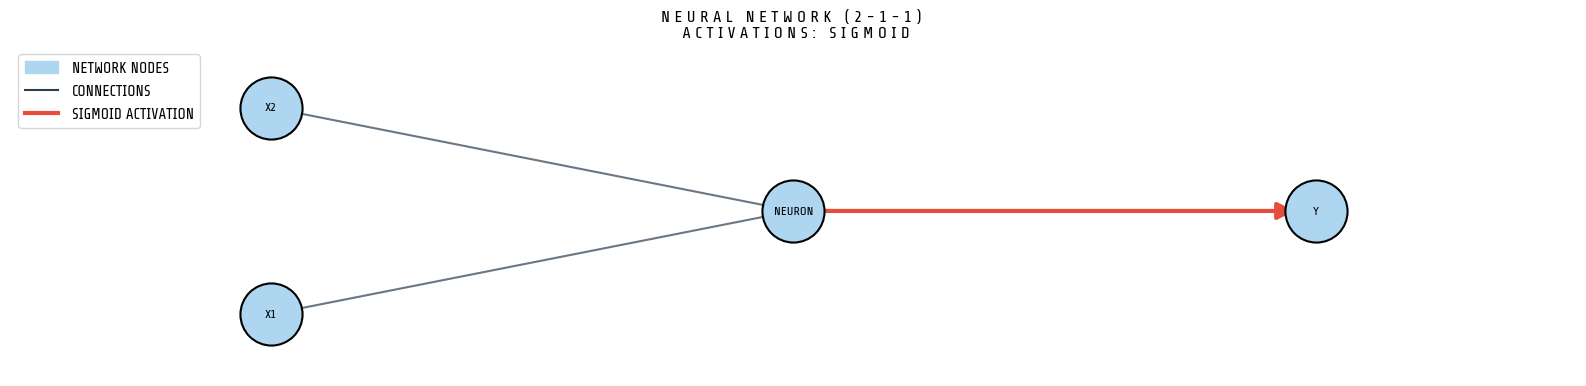

In [3]:
fig, ax, G, pos = utils.plotting.visualize_network_nx(neuron, figsize=(16, 4))

# Display information about the perceptron
print(f"Perceptron Architecture:")
print(f"  - Input features: {len(neuron.weights)}")
print(f"  - Activation function: {neuron.activation.__name__ if hasattr(neuron.activation, '__name__') else 'Custom'}")
print(f"  - Output: 1 (probability between 0 and 1)")
print(f"\nGraph Properties:")
print(f"  - Number of nodes: {G.number_of_nodes()}")
print(f"  - Number of edges: {G.number_of_edges()}")

# 2. Using Neurons to Solve Problems
***

<figure style="background-color: white; border-radius: 10px; padding: 20px; margin: 0 0 0 auto; float: right; display: inline-block; width: 40%;">
    <img src="figs\challenger.png" alt="Challenger O-rings" style="width: 100%; height: auto;">
</figure>

### Case Study: Space Shuttle Challenger Disaster

The explosion of the Space Shuttle Challenger on January 28, 1986, resulted from the failure of O-rings sealing the propulsion system. Critical components hadn't been properly tested at low temperatures, leading to catastrophic failure.

We'll analyze data from the Challenger disaster, examining the relationship between temperature at launch and O-ring failures. This real-world example demonstrates how neural networks can identify crucial patterns that might prevent disasters.

### Dataset Description

| Variable | Description |
|----------|-------------|
| `n_risky` | Number of O-rings at risk during launch |
| `n_distressed` | Number of O-rings experiencing thermal distress |
| `temp` | Temperature at launch (in degrees Fahrenheit) |
| `leak_psi` | Pressure at which the O-rings leak |
| `temporal_order` | Temporal order of the launch |


In [4]:
data_path = Path(Path.cwd(), 'datasets')
dataset_path = utils.data.download_dataset('challenger',
                                           dest_path=data_path,
                                           extract=True,
                                           remove_compressed=True)
dataset_path = dataset_path / 'o-ring-erosion-only.data'

Downloading:
Challenger USA Space Shuttle O-Ring dataset for predicting the failure of O-rings
> Authors: Draper, D.
> Year: 1993
> Website: https://archive.ics.uci.edu/dataset/92/challenger+usa+space+shuttle+o+ring



Extracting challenger+usa+space+shuttle+o+ring.zip: 100%|██████████| 4/4 [00:00<00:00, 1330.36it/s]

Removed compressed file: c:\Users\Corona\Documents\Git\UoM_fse_dl_workshop\datasets\challenger+usa+space+shuttle+o+ring.zip


In [5]:
cols = ['n_risky', 'n_distressed', 'temp', 'leak_psi', 'temporal_order']

df = pd.read_csv(dataset_path, sep="\\s+", header=None, names=cols)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_risky,23.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
n_distressed,23.0,0.304348,0.558796,0.0,0.0,0.0,0.5,2.0
temp,23.0,69.565217,7.057080,53.0,67.0,70.0,75.0,81.0
leak_psi,23.0,152.173913,68.221332,50.0,75.0,200.0,200.0,200.0
temporal_order,23.0,12.000000,6.782330,1.0,6.5,12.0,17.5,23.0


## 2.1 Preparing the Data
***
We'll build a model that predicts launch success based on temperature. Our goal is to use the `temp` variable as a feature to predict the `n_distressed` variable (O-ring failures).

### Pre-processing Steps
1. Convert temperature from Fahrenheit to Celsius
2. Cap the number of distressed O-rings to be between 0 and 1 (binary outcome)
3. Normalize the temperature using standardization (z-score)
4. Split the data into training and test sets

> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Hint**: Our input and target are one-dimensional, but we need to reshape them to be two-dimensional to represent the number of samples and the number of features. Use `.view(-1, 1)` for reshaping in PyTorch.

> <img src="figs/icons/code.svg" width="20" style="filter: invert(100%) sepia(100%) saturate(2000%) hue-rotate(40deg) brightness(915%) contrast(100%);"/> **Snippet 2**: Splitting data with sklearn
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```



Training data shape: torch.Size([18, 1]) inputs and torch.Size([18, 1]) targets
Testing data shape: torch.Size([5, 1]) inputs and torch.Size([5, 1]) targets
Temperature mean: 20.87°C, std: 3.92°C
Number of O-ring distress cases: 6.0 out of 23
--------------------------------------------------------------------------------
✅ f_to_c is correct!
✅ X_shape is correct!
✅ y_shape is correct!
✅ X_mean is correct!
✅ X_std is correct!
✅ n_distress_cases is correct!
✅ data_clipped is correct!
✅ train_test_split_ratio is correct!
✅ tensors_created is correct!

🎉 Excellent! All parts are correct!


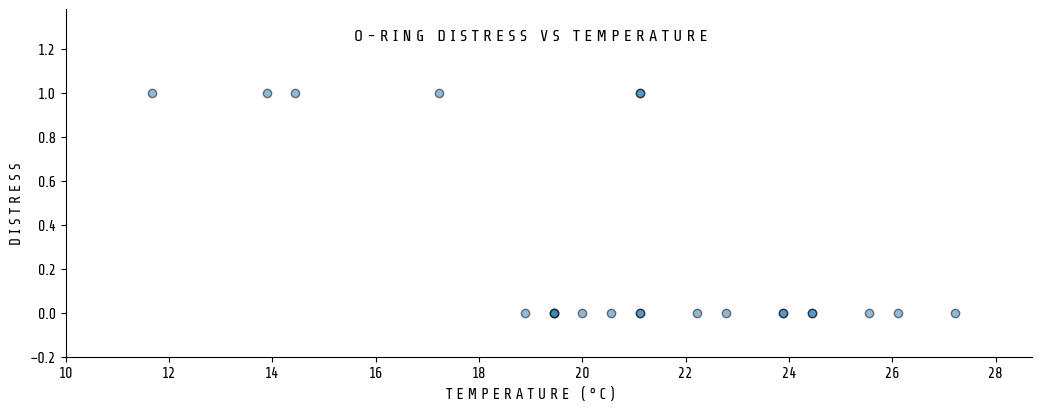

In [12]:
# Exercise 2: Data Preparation 🎯
# Implement:
# 1. Convert temperature from Fahrenheit to Celsius
# 2. Cap n_distressed values at 1.0 (binary outcome)
# 3. Convert features and targets to PyTorch tensors
# 4. Normalize the temperature data
# 5. Split the data into training and testing sets (80% train, 20% test)

# Step 1: Convert temperature from Fahrenheit to Celsius
def f_to_c(f:float) -> float:
    # The conversion formula is:
    # C = (F - 32) * 5 / 9
    return (f - 32) * 5 / 9 # Your code here

# Apply the conversion function to the temperature column
temp = df.temp.apply(f_to_c) # Your code here

# Step 2: Cap the n_distressed at 1.0 (binary outcome)
n_distressed = df.n_distressed.clip(upper=1.0) # Your code here

# Step 3: Convert features and targets to PyTorch tensors
X = torch.tensor(temp.values).float().view(-1, 1)  # Your code here
y = torch.tensor(n_distressed.values).float().view(-1, 1)  # Your code here

# Step 4: Normalize the temperature data for better training
# Use Standardization (z-score normalization)
X_mean = X.mean() # Your code here
X_std = X.std()  # Your code here
X_normalized = (X - X_mean) / X_std # Your code here

# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42) # Your code here
# Print the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape} inputs and {y_train.shape} targets")
print(f"Testing data shape: {X_test.shape} inputs and {y_test.shape} targets")
print(f"Temperature mean: {X_mean.item():.2f}°C, std: {X_std.item():.2f}°C")
print(f"Number of O-ring distress cases: {y.sum().item()} out of {len(y)}")


# ✅ Check your answer
answer = {
    'f_to_c': f_to_c,
    'X_shape': X_normalized.shape,
    'y_shape': y.shape,
    'X_mean': X_mean.item(),
    'X_std': X_std.item(),
    'n_distress_cases': y.sum().item(),
    'data_clipped': bool(n_distressed.max() <= 1.0),
    'train_test_split_ratio': len(X_train) / len(X) >= 0.75 and len(X_train) / len(X) <= 0.85,
    'tensors_created': isinstance(X, torch.Tensor) and isinstance(y, torch.Tensor)
}

checker.check_exercise(2, answer)

# Plot the data to visualize the relationship
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X.numpy(), y.numpy(), alpha=0.5, edgecolors='k')

utils.plotting.make_fig_pretty(ax, title="O-Ring Distress vs Temperature",
                             xlabel="Temperature (°C)", ylabel="Distress")

## 2.2 The Forward Pass
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: The forward pass is the process of feeding input data through the neural network to get predictions.

In our O-ring example:
- **Feature**: Temperature (X_normalized) - what our model uses for predictions
- **Target**: O-ring distress (y) - what we're trying to predict

### Forward Pass Process

| Step | Description |
|------|-------------|
| 1 | Input data (features) is fed into the network |
| 2 | Each layer processes the inputs it receives |
| 3 | Activation functions add non-linearity |
| 4 | Final layer produces output predictions |

For our single neuron model with temperature as input, this is expressed as:

$$\hat{y} = \sigma(w \cdot \text{temperature} + b)$$

### 2.2.1 Batch Processing vs. Individual Samples

In our implementation, we're processing one sample at a time in our loops:

```python
for i in range(len(X_normalized)): 
    predictions[i] = model(X_normalized[i])
```

This approach works for our small dataset (23 samples) and single feature, but in production machine learning, data is typically processed in batches for efficiency:

```python
# Process all samples in a single operation
predictions = model(X_normalized)  # For batch-compatible models
```

## 2.3 Loss Functions and Error Measurement
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: A loss function measures how far the predicted output of a model is from the actual target value.

### Why Measure Error?

Loss functions provide quantitative feedback on model performance:

1. **Optimization guidance**: Indicates direction for weight/bias adjustments
2. **Performance tracking**: Monitors model improvement during training
3. **Model comparison**: Provides objective metrics for different models
4. **Convergence detection**: Helps determine when to stop training

### Mean Squared Error (MSE)

We'll use the MSE loss function, defined as:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ n $ number of samples
- $ y_i $ actual target value for sample $ i $
- $ \hat{y}_i $ predicted target value for sample $ i $

> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Note**: For binary classification problems, Binary Cross-Entropy (BCE) loss is typically more suitable than MSE, but we're using MSE here for simplicity.


In [7]:
# Exercise 3: Implementing a Loss Function 🎯
# In this exercise, you will:
# 1. Implement a Mean Squared Error (MSE) loss function
# 2. Create a modified neuron for the O-ring data
# 3. Compute predictions using the forward pass
# 4. Calculate the loss between predictions and actual targets

def mse_loss(predictions: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
    """Mean Squared Error loss function
    
    MSE = 1/n * Σ (predictions - targets)²
    where n is the number of samples.
    """
    # Calculate the squared difference between predictions and targets
    squared_diff = (predictions - targets) ** 2 # Your code here
    
    # Return the mean of the squared differences
    return squared_diff.mean() # Your code here

# Create a neuron specifically for the temperature data (1 input feature)
model = Perceptron(n_features=1) # Your code here
print(f"Initial model: {model}")

# Forward pass: Feed the normalized temperature data through the neuron
predictions = torch.zeros_like(y)

# Loop through each input sample and compute the prediction
for i in tqdm(range(len(X_normalized)), desc="Computing predictions"):
    # Use the model to compute the prediction for each input sample
    predictions[i] = model(X_normalized[i]) # Your code here


# Calculate the loss using our MSE loss function
loss = mse_loss(predictions, y)
print(f"Initial loss: {loss.item():.4f}")

# Alternatively, we can use PyTorch's built-in MSE loss function
pytorch_mse = torch.nn.MSELoss()
loss_pytorch = pytorch_mse(predictions, y)
print(f"PyTorch MSE loss: {loss_pytorch.item():.4f}")

# Check if our implementation matches PyTorch's (should be very close)
loss_function_correct = torch.isclose(loss, loss_pytorch, rtol=1e-4)
print(f"Our MSE implementation matches PyTorch: {loss_function_correct}")

# ✅ Check your answer
answer = {
    'mse_loss': mse_loss,
}
checker.check_exercise(3, answer)

Initial model: Neuron (weights = tensor([-0.1055]), bias = tensor([0.2092]))


Computing predictions: 100%|██████████| 23/23 [00:00<00:00, 7662.35it/s]

Initial loss: 0.2634
PyTorch MSE loss: 0.2634
Our MSE implementation matches PyTorch: True
--------------------------------------------------------------------------------
✅ mse_loss is correct!

🎉 Excellent! All parts are correct!


## 2.4 The Backward Pass (Backpropagation)
***
> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Definition**: The backward pass computes gradients of the loss with respect to the network parameters, which are used to update those parameters.

After computing the loss, we need to adjust our model's parameters (weights and bias) to improve predictions. This is done through **backpropagation**.

### Backpropagation Process

| Step | Description |
|------|-------------|
| 1 | Computing gradients | Calculate how loss changes with respect to each parameter |
| 2 | Propagating error backward | Work from output layer back to input layer |
| 3 | Applying the chain rule | Break down complex derivatives into simpler parts |

### Gradient Descent Update Rule

Once we have gradients, we update parameters:

$$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b}$$

Where:
- $\alpha$ learning rate (controls step size)
- $\frac{\partial L}{\partial w}$ gradient of loss with respect to weight
- $\frac{\partial L}{\partial b}$ gradient of loss with respect to bias

### PyTorch's Autograd System

> <img src="figs/icons/write.svg" width="20" style="filter: invert(41%) sepia(96%) saturate(1449%) hue-rotate(210deg) brightness(100%) contrast(92%);"/> **Important**: PyTorch automatically computes gradients using autograd, simplifying the backpropagation process.

When `requires_grad=True` is set on tensors (default for `nn.Parameter`):

1. PyTorch **tracks operations** in a computational graph
2. When we call `loss.backward()`, PyTorch **computes gradients** for all tracked tensors
3. Gradients are **stored in the `.grad` attribute** of each tensor
4. Gradients should be **zeroed out** before each training iteration to avoid accumulation from previous iterations. For the parameters, we can use `parameter.grad.zero_()` to reset gradients.

### Neural Network Training Cycle

| Phase | Description |
|-------|-------------|
| Forward Pass | Compute predictions with current parameters |
| Loss Calculation | Measure error between predictions and true values |
| Backward Pass | Compute gradients of loss with respect to parameters |
| Parameter Update | Adjust parameters to reduce loss |

This cycle repeats for multiple epochs until the model converges to a solution.

Now let's implement the backward pass and parameter updates for our O-ring prediction model.

In [8]:
# Exercise 4: Implementing the Backward Pass and Parameter Updates 🎯
# In this exercise, you will:
# 1. Implement a training loop with forward and backward passes
# 2. Use PyTorch's autograd to compute gradients
# 3. Update the model parameters using gradient descent
# 4. Visualize how the model's predictions improve over time

# Reset our model for training
model = Perceptron(n_features=1)
print(f"Initial model parameters: {model}")

# Define training hyperparameters
learning_rate = 0.1  # Your code here: Set an appropriate learning rate
num_epochs = 400     # Your code here: Set number of training epochs

# Lists to store training progress
train_losses = []

# Training loop
for epoch in tqdm(range(num_epochs), desc="Training Progress", bar_format="{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt} [Time: {elapsed}<{remaining}]"):
    # Forward pass: compute predictions
    predictions = torch.zeros_like(y)
    for i in range(len(X_normalized)):
        predictions[i] = model(X_normalized[i])  # Your code here: Get model prediction
    
    # Compute loss
    loss = mse_loss(predictions, y)  # Your code here: Calculate MSE loss
    train_losses.append(loss.item())
    
    # Backward pass: compute gradients
    loss.backward()  # Your code here: Compute gradients
    
    # Update parameters using gradient descent
    with torch.no_grad():  # No need to track gradients during the update
        # Your code here: Update weights using gradient descent
        model.weights -= learning_rate * model.weights.grad
        # Your code here: Update bias using gradient descent
        model.bias -= learning_rate * model.bias.grad
    
    # Zero gradients for the next iteration
    # Your code here: Zero out the gradients
    model.weights.grad.zero_()
    model.bias.grad.zero_()

print(f"Final model parameters: {model}")
print(f"Final loss: {train_losses[-1]:.4f}")

# Calculate final predictions
with torch.no_grad():
    final_predictions = torch.zeros_like(y)
    for i in range(len(X_normalized)):
        final_predictions[i] = model(X_normalized[i])

# ✅ Check your answer - is the loss decreasing over time?
answer = {
    'training_convergence': train_losses[0] > train_losses[-1],
    'final_loss': train_losses[-1],
    'negative_weight': model.weights.item() < 0
}
checker.check_exercise(4, answer)

Initial model parameters: Neuron (weights = tensor([-0.5549]), bias = tensor([0.8725]))


Training Progress: 100%|██████████| 400/400 [Time: 00:01<00:00]

Final model parameters: Neuron (weights = tensor([-1.4534]), bias = tensor([-1.1732]))
Final loss: 0.1027
--------------------------------------------------------------------------------
✅ training_convergence is correct!
✅ final_loss is correct!
✅ negative_weight is correct!

🎉 Excellent! All parts are correct!


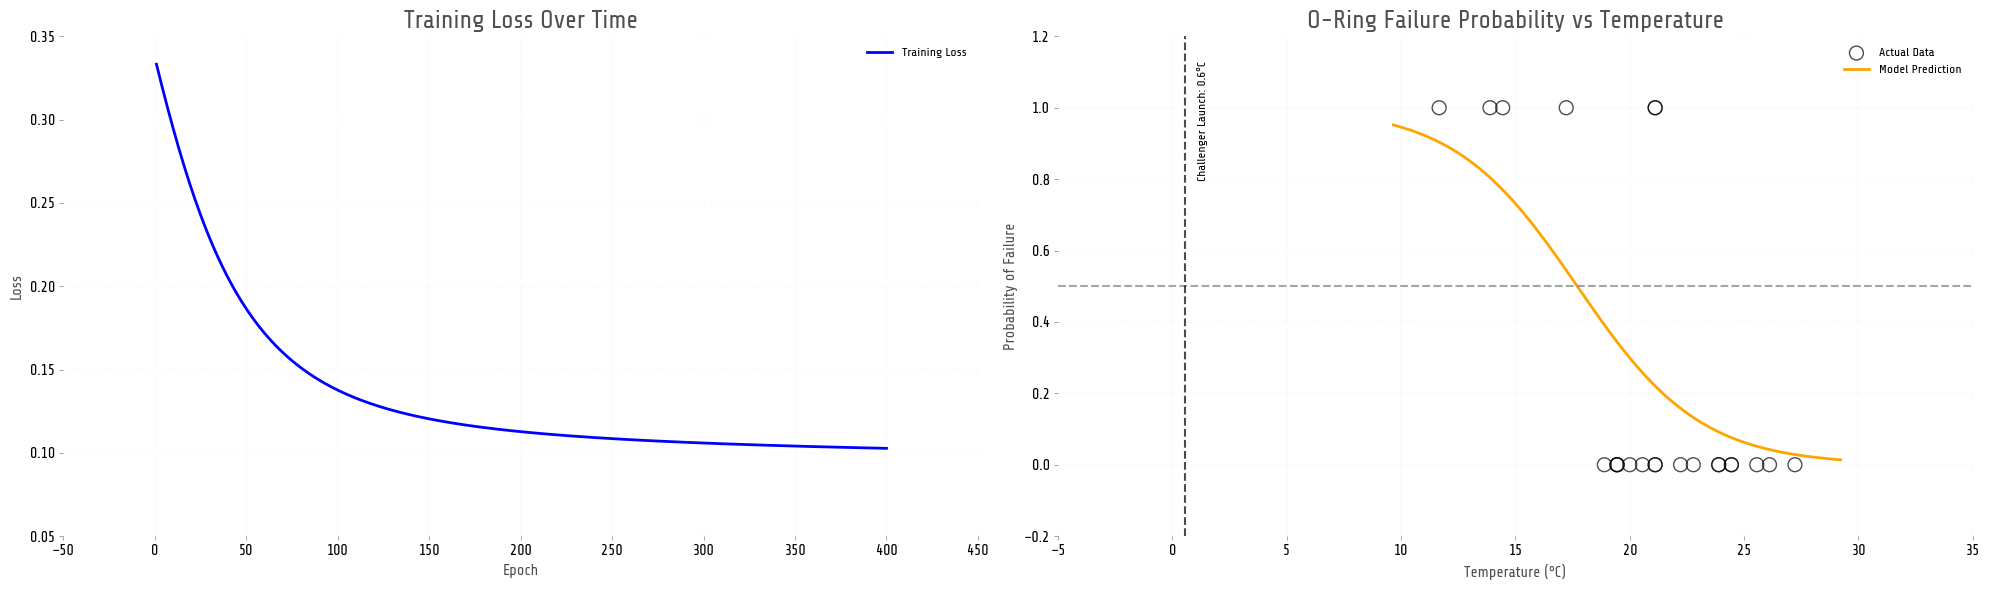

In [9]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot training loss
utils.plotting.plot_loss(
    train_losses, 
    title="Training Loss Over Time",
    tufte_style=True,
    title_fsize=18,
    ax=ax1
)

# Plot model predictions
utils.plotting.plot_model_predictions_SE02(
    model=model,
    X=X_normalized,
    y=y,
    X_mean=X_mean.item(),
    X_std=X_std.item(),
    special_temp=challenger_temp,
    special_temp_label=f'Challenger Launch: {challenger_temp:.1f}°C',
    title="O-Ring Failure Probability vs Temperature",
    tufte_style=True,
    ax=ax2,
    title_fsize=18,
)

plt.tight_layout()
plt.show()

In [10]:
# Interactive visualization of the O-ring failure model
# This uses our external interactive visualization function

# Create the interactive visualization widget
main_ui, out = utils.plotting.create_interactive_neuron_visualizer(
    X=X_normalized,
    y=y,
    X_mean=X_mean.item(),
    X_std=X_std.item(),
    challenger_temp=challenger_temp,
    neuron_class=Perceptron,
    loss_function=mse_loss,
    initial_weight=float(model.weights.item()),
    initial_bias=float(model.bias.item()),
    learning_rate=0.1,
    training_epochs=100
)

# Display the interactive widget
display(main_ui, out)

Output()

# 2.5 Using the model to predict O-ring distress
***
Having trained out model, we now want to use it to predict the potential for O-ring distress at different temperatures. Using models in this way is called *inference*. To do this, we need to consider the following:

- Data preparation: The data we want to predict on needs to be in the same format as the data we trained on. This means that we need to apply the same transformations (e.g., normalization) to the new data.
- Gradient tracking: When we are using the model for inference, we do not need to track gradients. This is because we are not updating the model parameters during inference. We can use `torch.no_grad()` to disable gradient tracking.
- Model input: The model input should be a tensor with the same shape as the training data. If we are predicting on a single sample, we need to add an extra dimension to the tensor to make it 2D.

Let's implement the inference process for our O-ring prediction model. 

In [11]:
# Exercise 5: Making Predictions for the Challenger Launch 🎯
# In this exercise, you will make predictions about the O-ring failure at the Challenger launch temperature
# and calculate the relative risk compared to normal temperatures

# The Challenger launch temperature was 31°F (-0.56°C)
challenger_launch_temp = f_to_c(31.0)
print(f"Challenger launch temperature: {challenger_launch_temp:.2f}°C")

# Normalize the temperature using the same parameters as our training data
challenger_temp_normalized = (challenger_launch_temp - X_mean.item()) / X_std.item() # Your code here
challenger_tensor = torch.tensor([challenger_temp_normalized], dtype=torch.float32) # Your code here

# Use the trained model to predict the probability of O-ring failure
with torch.no_grad():
    failure_probability = model(challenger_tensor).item()

print(f"Predicted probability of O-ring failure: {failure_probability:.4f} or {failure_probability*100:.1f}%")

# Determine if this probability indicates a high risk
# A common threshold in binary classification is 0.5 (50% probability)
failure_risk = "HIGH RISK" if failure_probability > 0.5 else "LOW RISK"

# What is your launch recommendation based on this analysis?
launch_recommendation = "DO NOT LAUNCH" if failure_probability > 0.5 else "PROCEED WITH LAUNCH"

print(f"Risk assessment: {failure_risk}")
print(f"Launch recommendation: {launch_recommendation}")

# Calculate how many times more likely failure is at the launch temperature compared to a warmer day (20°C)
warm_temp = 20.0  # A much warmer temperature in Celsius
warm_temp_normalized = (warm_temp - X_mean.item()) / X_std.item()
warm_tensor = torch.tensor([warm_temp_normalized], dtype=torch.float32)

with torch.no_grad():
    warm_failure_probability = model(warm_tensor).item()

relative_risk = failure_probability / warm_failure_probability if warm_failure_probability > 0 else float('inf')
print('-' * 80)
print(f"Probability of failure at 20°C: {warm_failure_probability:.4f} or {warm_failure_probability*100:.1f}%")
print(f"Failure at launch temperature is {relative_risk:.1f}x more likely than at 20°C")


# ✅ Check your answer
answer = {
    'challenger_failure_prob': failure_probability,
    'recommendation': launch_recommendation == "DO NOT LAUNCH",
    'relative_risk_factor': relative_risk > 3,  # Is risk at least 3 times higher?
}
checker.check_exercise(5, answer)

Challenger launch temperature: -0.56°C
Predicted probability of O-ring failure: 0.9989 or 99.9%
Risk assessment: HIGH RISK
Launch recommendation: DO NOT LAUNCH
--------------------------------------------------------------------------------
Probability of failure at 20°C: 0.2993 or 29.9%
Failure at launch temperature is 3.3x more likely than at 20°C
--------------------------------------------------------------------------------
✅ challenger_failure_prob is correct!
✅ recommendation is correct!
✅ relative_risk_factor is correct!

🎉 Excellent! All parts are correct!


## 2.6 Key Insights from Our Analysis
***
Our trained model shows a strong correlation between temperature and O-ring failure probability. At the Challenger launch temperature of 31°F (-0.56°C), the model predicts an extremely high probability of failure.

### Critical Lessons

| Insight | Description |
|---------|-------------|
| **Temperature threshold** | Risk increases dramatically below a critical temperature point |
| **Data-driven decisions** | Statistical analysis could have provided strong evidence against launching |
| **Risk assessment** | The model correctly identifies risk despite limited low-temperature data |
| **Communication** | Technical findings must be effectively communicated to decision-makers |

The Rogers Commission, which investigated the disaster, found that NASA managers had disregarded warnings from engineers about the dangers of launching in cold temperatures—a tragic example of how crucial effective communication of technical risks can be.

### 2.6.1 The Challenger Disaster and Data Science Ethics
***
Our analysis demonstrates a sobering point: proper data analysis could have potentially prevented this disaster. As our model shows, the probability of O-ring failure increases dramatically at lower temperatures, and the launch temperature of 31°F (-0.56°C) was well within the danger zone.

> <img src="figs/icons/reminder.svg" width="20" style="filter: invert(100%) sepia(1500%) saturate(1500%) hue-rotate(30deg) brightness(450%) contrast(70%);"/> **Ethics Note**: When lives depend on our analyses, data scientists have a responsibility to be thorough, transparent, and to clearly communicate risks to decision-makers.